In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import io
import matplotlib.ticker as mtick
import requests
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading the data

In [2]:
data = pd.read_csv('Telcom-Customer-Churn.csv')

In [3]:
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data Manipulation:

In [6]:
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

In [7]:
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

In [8]:
rep_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies' , 'MultipleLines']
for i in rep_cols : 
    data[i]  = data[i].replace({'No internet service' : 'No'})
    data[i]  = data[i].replace({'No phone service' : 'No'})

In [9]:
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [10]:
data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn'].replace(to_replace='No',  value=0, inplace=True)



In [11]:
def ten(data) :
    
    if data["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (data["tenure"] > 12) & (data["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (data["tenure"] > 24) & (data["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (data["tenure"] > 48) & (data["tenure"] <= 60) :
        return "Tenure_48-60"
    elif data["tenure"] > 60 :
        return "Tenure_gt_60"
data["tenure_group"] = data.apply(lambda data:ten(data),
                                      axis = 1)

In [12]:
churn     = data[data["Churn"] == "Yes"]
not_churn = data[data["Churn"] == "No"]


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [13]:
Id   = ['customerID']
target = ["Churn"]
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target]
num_cols   = [x for x in data.columns if x not in cat_cols + target + Id]

In [14]:
cat_cols


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [15]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
data.drop(['customerID'],axis=1,inplace=True)

In [17]:
data.head(10)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Tenure_0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Tenure_24-48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Tenure_0-12
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Tenure_24-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Tenure_0-12
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,Tenure_0-12
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,Tenure_12-24
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,Tenure_0-12
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Tenure_24-48
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,Tenure_gt_60


Data Visualization:

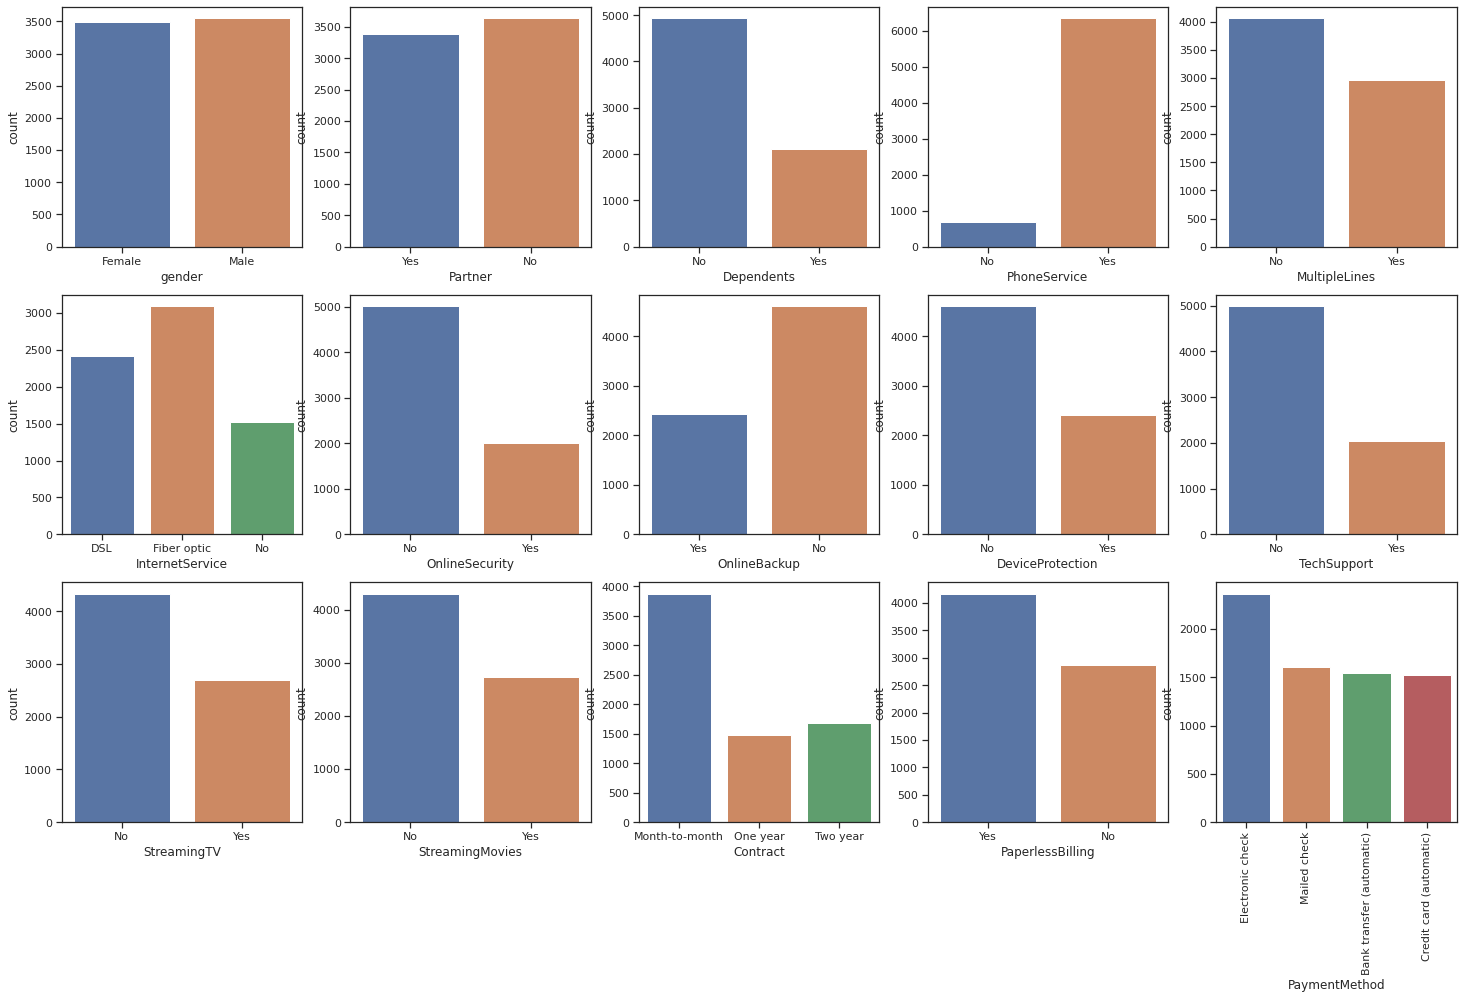

In [18]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks", color_codes=True)

fig, axes = plt.subplots(nrows = 3,ncols = 5,figsize = (25,15))
sns.countplot(x = "gender", data = data, ax=axes[0][0])
sns.countplot(x = "Partner", data = data, ax=axes[0][1])
sns.countplot(x = "Dependents", data = data, ax=axes[0][2])
sns.countplot(x = "PhoneService", data = data, ax=axes[0][3])
sns.countplot(x = "MultipleLines", data = data, ax=axes[0][4])
sns.countplot(x = "InternetService", data = data, ax=axes[1][0])
sns.countplot(x = "OnlineSecurity", data = data, ax=axes[1][1])
sns.countplot(x = "OnlineBackup", data = data, ax=axes[1][2])
sns.countplot(x = "DeviceProtection", data = data, ax=axes[1][3])
sns.countplot(x = "TechSupport", data = data, ax=axes[1][4])
sns.countplot(x = "StreamingTV", data = data, ax=axes[2][0])
sns.countplot(x = "StreamingMovies", data = data, ax=axes[2][1])
sns.countplot(x = "Contract", data = data, ax=axes[2][2])
sns.countplot(x = "PaperlessBilling", data = data, ax=axes[2][3])
ax = sns.countplot(x = "PaymentMethod", data = data, ax=axes[2][4])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show(fig)


since in the above graph it shows whether the feature is yes or no and some of them are specified in 2or 3 categories.

In [19]:
df_dummies = pd.get_dummies(data)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0


in above we perfomed one hot enconding beacuse we have many categorical variables.

In [20]:
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0
7028,0,72,103.20,7362.90,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
7030,1,4,74.40,306.60,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0


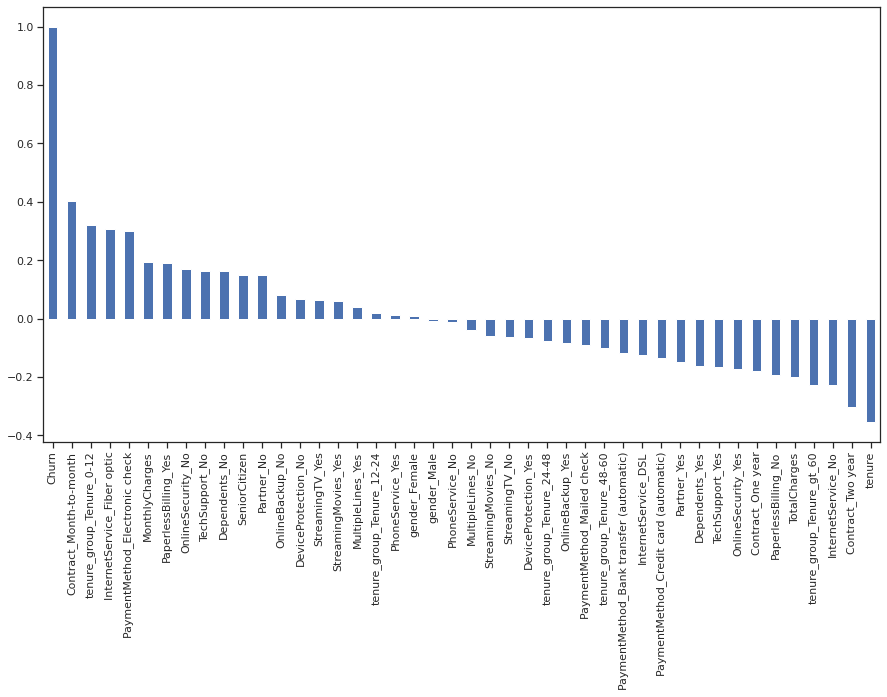

In [21]:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

in this we observed contract, tenure and internet service has more impact on dataset. 

Text(0.5, 1.0, '% of Senior Citizens')

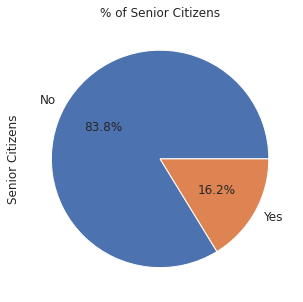

In [22]:
a = (data['SeniorCitizen'].value_counts()*100.0 /len(data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
a.yaxis.set_major_formatter(mtick.PercentFormatter())
a.set_ylabel('Senior Citizens',fontsize = 12)
a.set_title('% of Senior Citizens', fontsize = 12)

here the sernior citizens % is 16.2% and rest is not.

Text(0.5, 1.0, '# of Customers by their tenure')

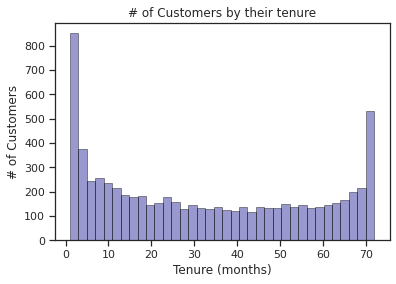

In [23]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

it consists of tenure months are less then customers are more.only few are survived for less months. 

Text(0.5, 1.0, '# of Customers by Contract Type')

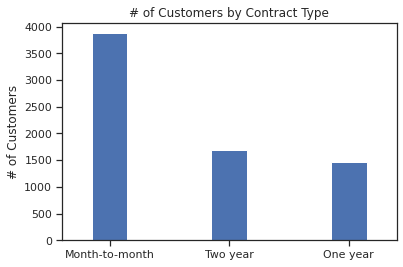

In [24]:
a1 = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
a1.set_ylabel('# of Customers')
a1.set_title('# of Customers by Contract Type')

in the above month-to-month contract has impact is more


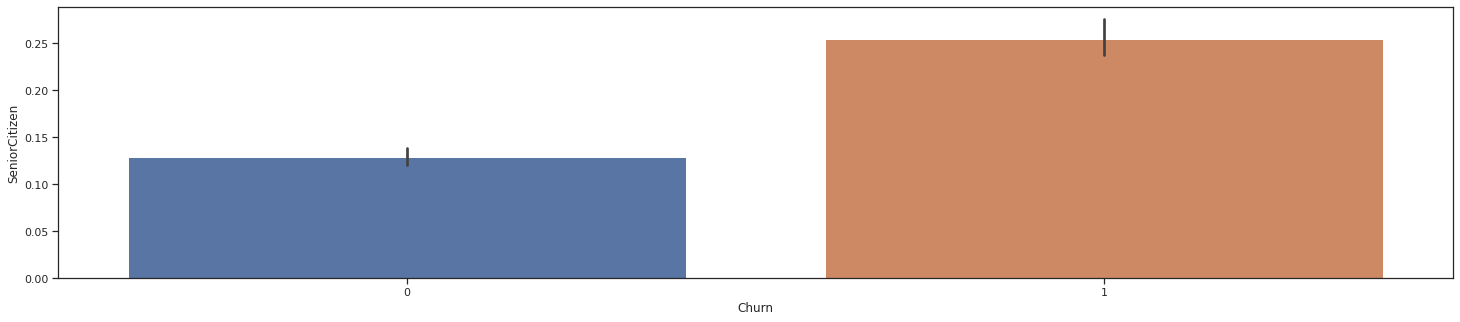

In [25]:

plt.subplots(figsize=(25,5))
sns.barplot(y="SeniorCitizen",x="Churn",data=data)

the senior citizens having high churn .

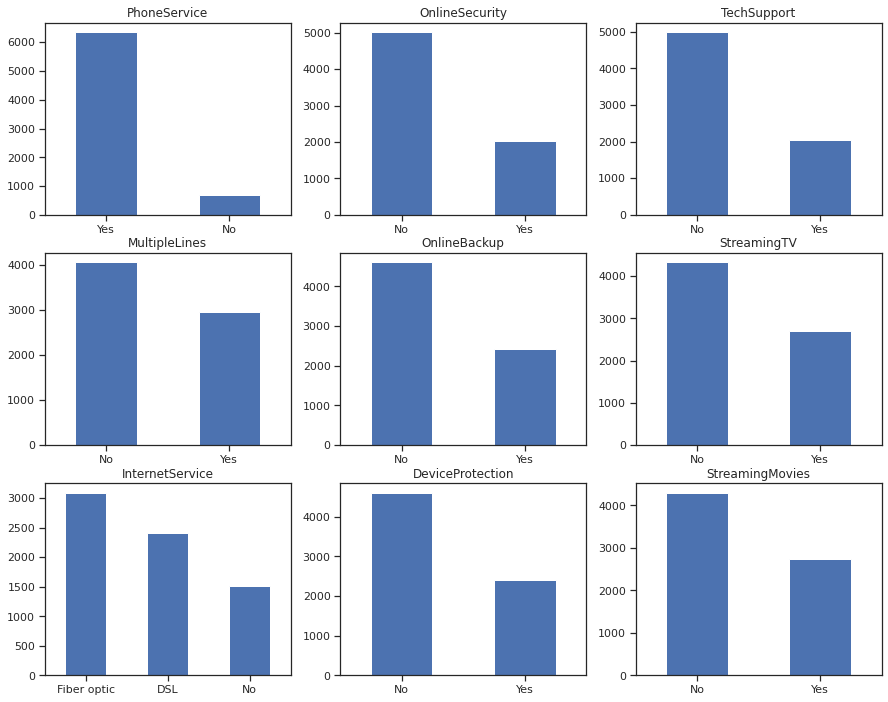

In [26]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


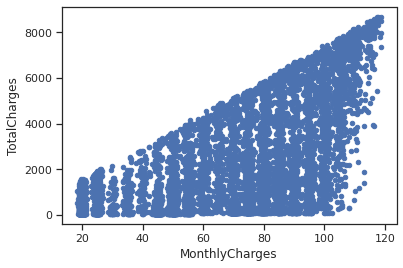

In [27]:
data[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

As monthly charges increases total charges also increases.

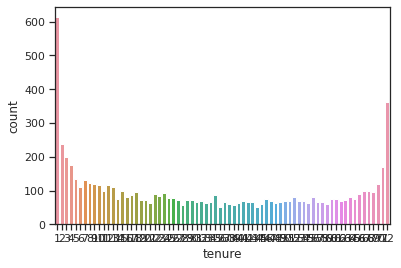

In [28]:
sns.countplot(x='tenure', data=data)

intially many customers are registered .

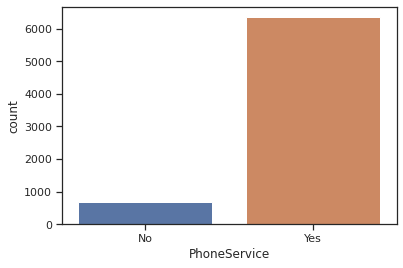

In [29]:
sns.countplot(x='PhoneService', data=data)

lot of people has phone service.

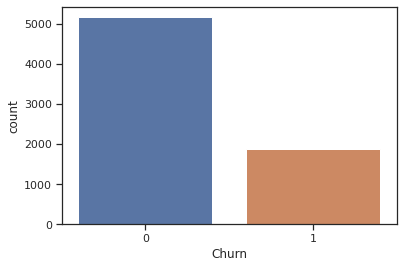

In [30]:
sns.countplot(x='Churn', data=data)

the output column shows less people are reatined their service.

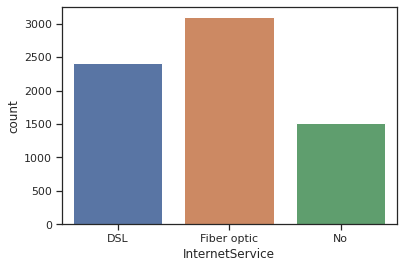

In [31]:
sns.countplot(x='InternetService', data=data)

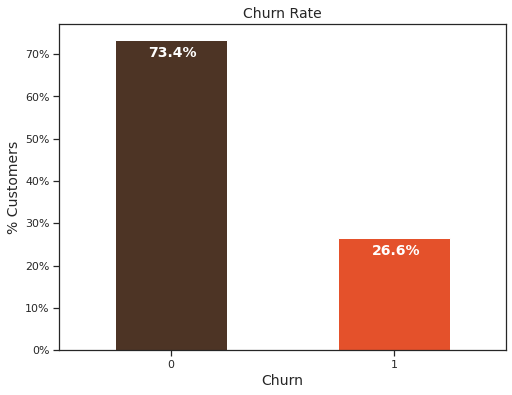

In [32]:
colors = ['#4D3425','#E4512B']
ax = (data['Churn'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

totals = []


for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)


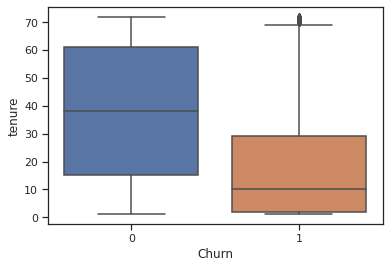

In [33]:
sns.boxplot(x = data.Churn, y = data.tenure)

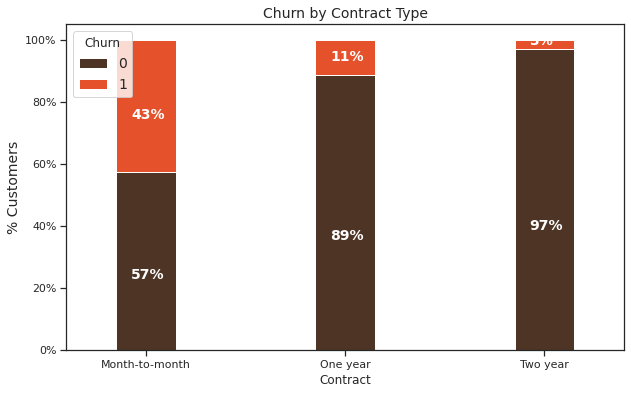

In [34]:
colors = ['#4D3425','#E4512B']
contract_churn = data.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


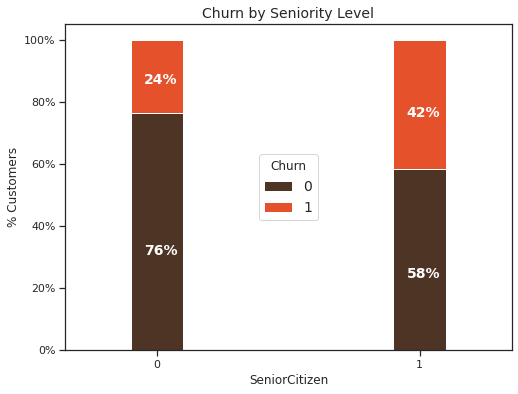

In [35]:
colors = ['#4D3425','#E4512B']
seniority_churn = data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

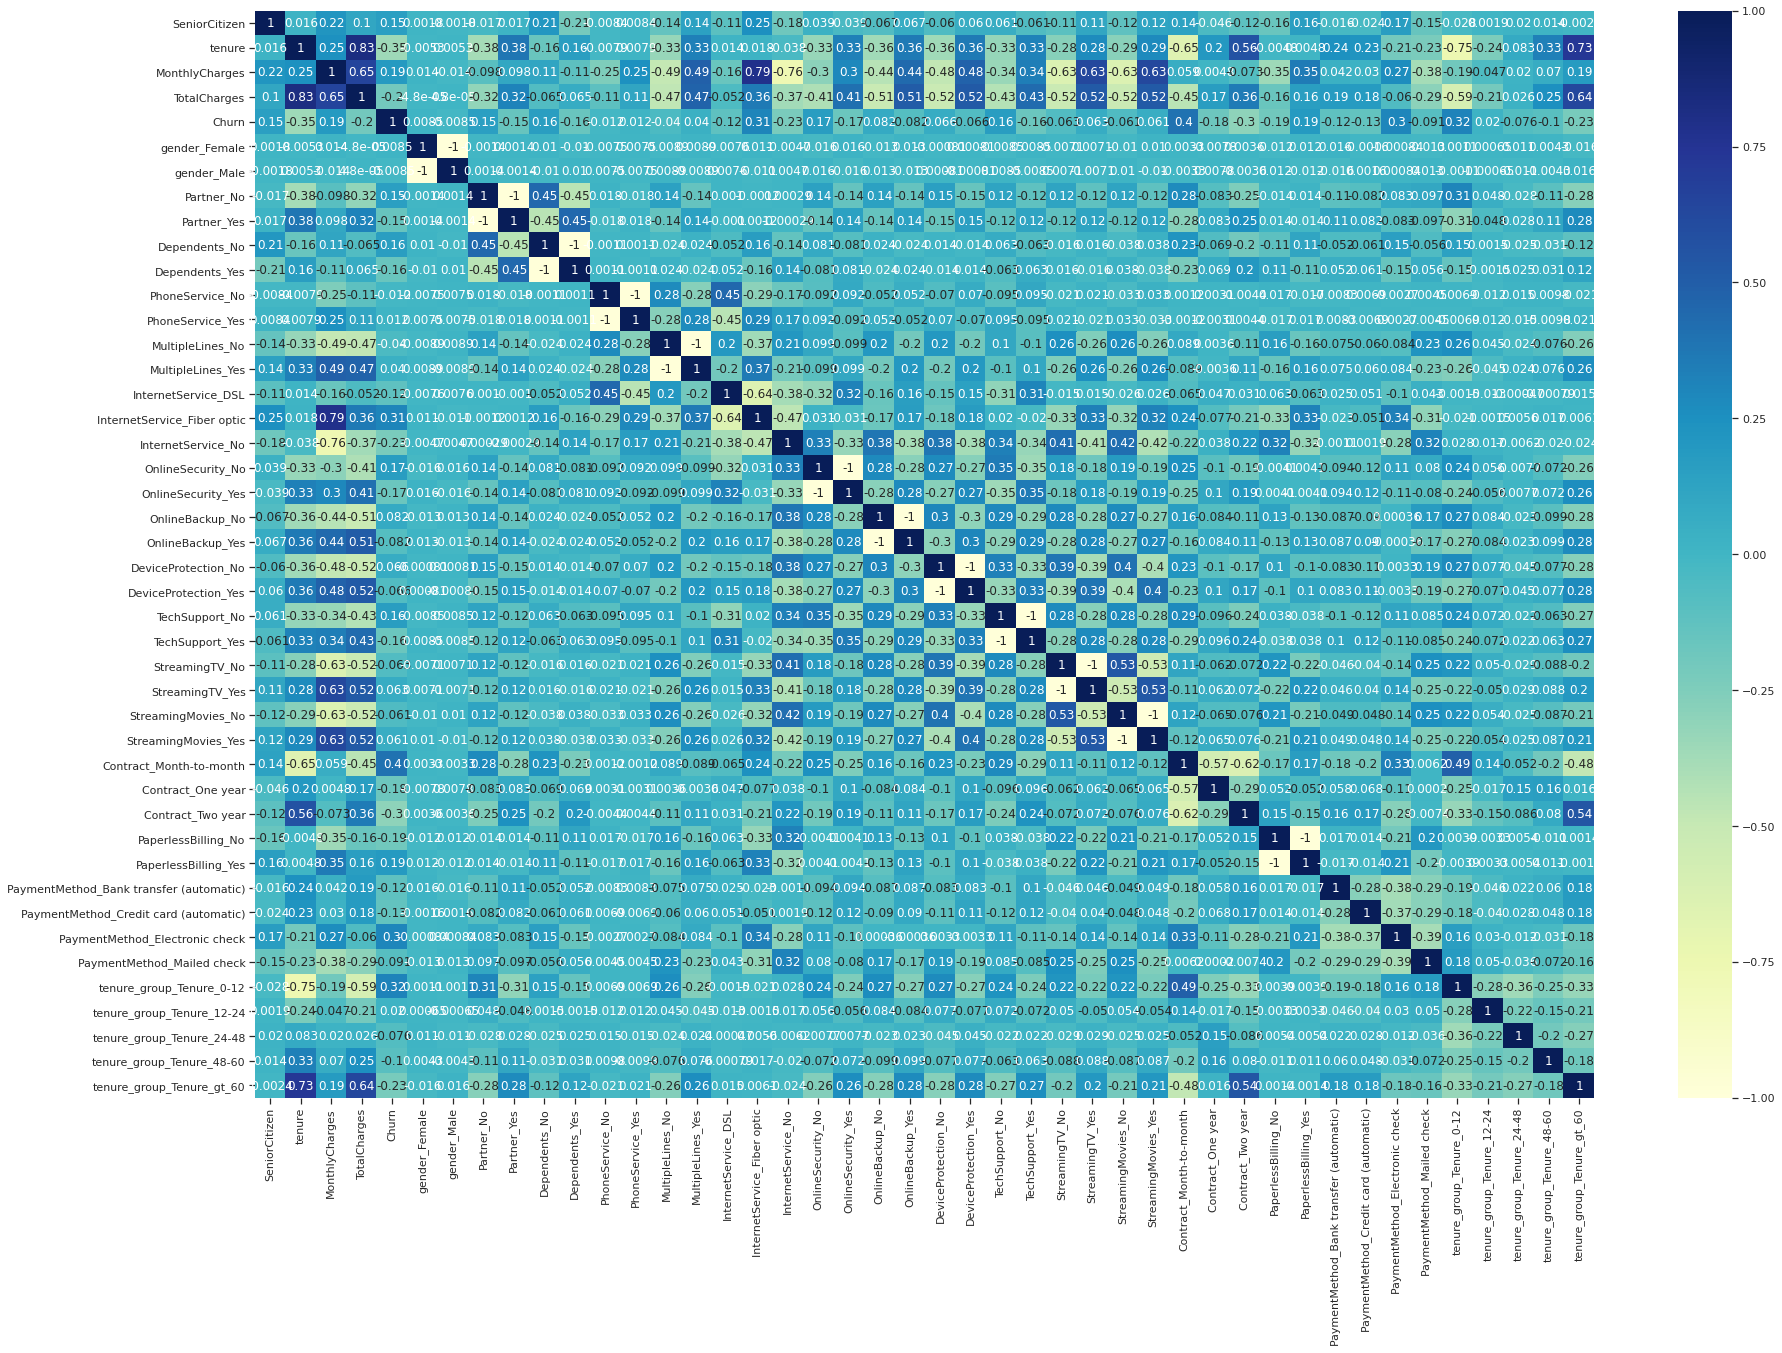

In [36]:
d=df_dummies.corr()
plt.figure(figsize=(30,20))
sns.heatmap(d,vmin=-1, vmax=1,cmap="YlGnBu",annot=True)  
plt.show()

Handling missing values

In [37]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

In [38]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Tenure_0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,Tenure_24-48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Tenure_0-12
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Tenure_24-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Tenure_0-12


since there is no missing values no problem with that.

Feature Selection:

In [39]:
mapping = {label : idx for idx, label in enumerate(np.unique(data['InternetService'].dropna()))}
mapping

{'DSL': 0, 'Fiber optic': 1, 'No': 2}

In [40]:
data['InternetService'] = data['InternetService'].map(mapping)

In [41]:
mapping1 = {label : idx for idx, label in enumerate(np.unique(data['Contract'].dropna()))}
mapping1

{'Month-to-month': 0, 'One year': 1, 'Two year': 2}

In [42]:
data['Contract'] = data['Contract'].map(mapping1)

In [43]:
mapping2 = {label : idx for idx, label in enumerate(np.unique(data['PaymentMethod'].dropna()))}
mapping2

{'Bank transfer (automatic)': 0,
 'Credit card (automatic)': 1,
 'Electronic check': 2,
 'Mailed check': 3}

In [44]:
data['PaymentMethod'] = data['PaymentMethod'].map(mapping2)

In [45]:
mapping3 = {label : idx for idx, label in enumerate(np.unique(data['gender'].dropna()))}
mapping3

{'Female': 0, 'Male': 1}

In [46]:
data['gender'] = data['gender'].map(mapping3)


In [47]:

mapping4 = {label : idx for idx, label in enumerate(np.unique(data['Dependents'].dropna()))}
mapping4

{'No': 0, 'Yes': 1}

In [48]:
data['Dependents'] = data['Dependents'].map(mapping4)

In [49]:

mapping5 = {label : idx for idx, label in enumerate(np.unique(data['Partner'].dropna()))}
mapping5

{'No': 0, 'Yes': 1}

In [50]:
data['Partner'] = data['Partner'].map(mapping5)

In [51]:

mapping6 = {label : idx for idx, label in enumerate(np.unique(data['PhoneService'].dropna()))}
mapping6

{'No': 0, 'Yes': 1}

In [52]:
data['PhoneService'] = data['PhoneService'].map(mapping6)

In [53]:

mapping7 = {label : idx for idx, label in enumerate(np.unique(data['OnlineSecurity'].dropna()))}
mapping7

{'No': 0, 'Yes': 1}

In [54]:
data['OnlineSecurity'] = data['OnlineSecurity'].map(mapping7)

In [55]:

mapping8 = {label : idx for idx, label in enumerate(np.unique(data['OnlineBackup'].dropna()))}
mapping8

{'No': 0, 'Yes': 1}

In [56]:
data['OnlineBackup'] = data['OnlineBackup'].map(mapping8)

In [57]:

mapping9 = {label : idx for idx, label in enumerate(np.unique(data['MultipleLines'].dropna()))}
mapping9

{'No': 0, 'Yes': 1}

In [58]:
data['MultipleLines'] = data['MultipleLines'].map(mapping9)

In [59]:

mapping10 = {label : idx for idx, label in enumerate(np.unique(data['DeviceProtection'].dropna()))}
mapping10

{'No': 0, 'Yes': 1}

In [60]:
data['DeviceProtection'] = data['DeviceProtection'].map(mapping10)

In [61]:

mapping11 = {label : idx for idx, label in enumerate(np.unique(data['TechSupport'].dropna()))}
mapping11

{'No': 0, 'Yes': 1}

In [62]:
data['TechSupport'] = data['TechSupport'].map(mapping11)

In [63]:

mapping12 = {label : idx for idx, label in enumerate(np.unique(data['StreamingTV'].dropna()))}
mapping12

{'No': 0, 'Yes': 1}

In [64]:
data['StreamingTV'] = data['StreamingTV'].map(mapping12)

In [65]:

mapping13 = {label : idx for idx, label in enumerate(np.unique(data['StreamingMovies'].dropna()))}
mapping13

{'No': 0, 'Yes': 1}

In [66]:
data['StreamingMovies'] = data['StreamingMovies'].map(mapping13)

In [67]:

mapping14 = {label : idx for idx, label in enumerate(np.unique(data['PaperlessBilling'].dropna()))}
mapping14

{'No': 0, 'Yes': 1}

In [68]:
data['PaperlessBilling'] = data['PaperlessBilling'].map(mapping14)

In [69]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0,Tenure_0-12
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0,Tenure_24-48
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1,Tenure_0-12
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0,Tenure_24-48
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,Tenure_0-12


In [70]:
data.drop(['tenure_group'],axis=1,inplace=True)

In [71]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [72]:
data.drop([ 'OnlineBackup','gender','DeviceProtection','StreamingTV', 'StreamingMovies' ],axis=1,inplace=True)


In [73]:
import math

In [74]:
data['MonthlyCharges'] =data['MonthlyCharges'].apply(lambda x:math.ceil(x))

In [75]:

data['TotalCharges'] =data['TotalCharges'].apply(lambda x:math.ceil(x))

In [76]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,0,0,0,1,2,30,30,0
1,0,0,0,34,1,0,0,1,0,1,0,3,57,1890,0
2,0,0,0,2,1,0,0,1,0,0,1,3,54,109,1
3,0,0,0,45,0,0,0,1,1,1,0,0,43,1841,0
4,0,0,0,2,1,0,1,0,0,0,1,2,71,152,1


In [77]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values


Feature Scaling:

In [78]:
# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [79]:
X


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.11,0.001269
1,0.0,0.0,0.0,0.464789,1.0,0.0,0.0,1.0,0.0,0.5,0.0,1.000000,0.38,0.215901
2,0.0,0.0,0.0,0.014085,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.000000,0.35,0.010385
3,0.0,0.0,0.0,0.619718,0.0,0.0,0.0,1.0,1.0,0.5,0.0,0.000000,0.24,0.210247
4,0.0,0.0,0.0,0.014085,1.0,0.0,0.5,0.0,0.0,0.0,1.0,0.666667,0.52,0.015347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.0,1.0,1.0,0.323944,1.0,1.0,0.0,1.0,1.0,0.5,1.0,1.000000,0.66,0.227556
7028,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,0.0,0.5,1.0,0.333333,0.85,0.847450
7029,0.0,1.0,1.0,0.140845,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.666667,0.11,0.037849
7030,1.0,1.0,0.0,0.042254,1.0,1.0,0.5,0.0,0.0,0.0,1.0,1.000000,0.56,0.033233


In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [81]:

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [82]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [83]:

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [84]:
featureScores

,Specs,Score
0,SeniorCitizen,133.482766
1,Partner,81.857769
2,Dependents,131.271509
3,tenure,238.007569
4,PhoneService,0.092948
5,MultipleLines,6.514651
6,InternetService,4.857635
7,OnlineSecurity,147.165601
8,TechSupport,135.439602
9,Contract,555.879527


In [85]:
print(featureScores.nlargest(18,'Score'))

               Specs       Score
9           Contract  555.879527
3             tenure  238.007569
7     OnlineSecurity  147.165601
8        TechSupport  135.439602
0      SeniorCitizen  133.482766
2         Dependents  131.271509
10  PaperlessBilling  104.979224
1            Partner   81.857769
13      TotalCharges   73.249034
12    MonthlyCharges   51.137309
11     PaymentMethod   19.746836
5      MultipleLines    6.514651
6    InternetService    4.857635
4       PhoneService    0.092948


In [86]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,0,0,0,1,2,30,30,0
1,0,0,0,34,1,0,0,1,0,1,0,3,57,1890,0
2,0,0,0,2,1,0,0,1,0,0,1,3,54,109,1
3,0,0,0,45,0,0,0,1,1,1,0,0,43,1841,0
4,0,0,0,2,1,0,1,0,0,0,1,2,71,152,1


In [87]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [88]:
X_train.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2785,0.0,0.0,0.0,0.690141,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.666667,0.91,0.638472
896,0.0,0.0,0.0,0.154930,1.0,0.0,0.5,1.0,1.0,0.0,1.0,0.000000,0.80,0.127164
3958,1.0,1.0,0.0,0.718310,1.0,1.0,0.5,0.0,0.0,0.5,1.0,0.666667,0.88,0.646550
5193,0.0,0.0,0.0,0.112676,1.0,0.0,1.0,0.0,0.0,0.5,1.0,0.666667,0.01,0.016847
1270,0.0,1.0,1.0,0.859155,1.0,1.0,0.5,1.0,0.0,1.0,1.0,0.000000,0.83,0.763905


In [89]:
data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,0,0,0,0,1,2,30,30,0
1,0,0,0,34,1,0,0,1,0,1,0,3,57,1890,0
2,0,0,0,2,1,0,0,1,0,0,1,3,54,109,1
3,0,0,0,45,0,0,0,1,1,1,0,0,43,1841,0
4,0,0,0,2,1,0,1,0,0,0,1,2,71,152,1


In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [91]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test)*100)

80.42654028436019


In [92]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)


In [93]:
model_rf.fit(X_train, y_train)
# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test)*100)

81.80525941719972


In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [95]:
#from sklearn.svm import SVC

#model.svm = SVC(kernel='linear') 


In [96]:
#model.svm.fit(X_train,y_train)
#preds = model.svm.predict(X_test)
#metrics.accuracy_score(y_test, preds)*100

In [97]:
#from sklearn.metrics import classification_report, confusion_matrix  
#print(confusion_matrix(y_test,preds))  

In [98]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
modelada = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)


In [99]:

modelada.fit(X_train,y_train)
preds1 = modelada.predict(X_test)
a2=metrics.accuracy_score(y_test, preds1)*100
print(a2)

81.4498933901919


In [100]:
from xgboost import XGBClassifier
modelxg = XGBClassifier()


In [101]:

modelxg.fit(X_train, y_train)
preds2 = modelxg.predict(X_test)
a3=metrics.accuracy_score(y_test, preds2)*100
print(a3)

81.94740582800284


In [102]:
import joblib

In [103]:

joblib.dump(modelada,open('churnlog.pkl','wb'))

In [104]:
#joblib_file='churnlog.pkl'
#joblib.dump(model,joblib_file)

In [105]:
#joblib_log_model=joblib.load(joblib_file)
#joblib_log_model